In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import csv
import math

from matplotlib.ticker import AutoMinorLocator

In [3]:
count = 6
x = []
y = [[] for i in range(count + 1)]
su = [[] for i in range(count + 1)]

alpha = 1

with open('/home/amir/repos/FGPRS/results/speedup.csv', 'r') as file:
    dummy = csv.reader(file)

    for row in dummy:        
        x.append(float(row[0]))
        
        for i in range(1, count + 1):
            if len(y[i - 1]) > 1:
                y[i - 1].append(float(row[i]) * alpha + y[i - 1][-1] * (1 - alpha))
            else:
                y[i - 1].append(float(row[i]))

def toSpeedup(x):
    y = []
#     f = min(math.pow(2 * x[0] / x[1] * x[0] / x[1], 1 / 3), 2) * x[0]
    f = min(math.pow(2 * x[0] / x[1], 1 / 2), 2) * x[0]
#     f = min((x[0] / x[1] + 2) / 2, 2) * x[0]
#     f = 2 * x[0]
    g = 2
    
    for d in x:
        y.append(min(f / d, g))
        g = g + 2
    
    return y

for i in range(count):
    su[i] = toSpeedup(y[i])

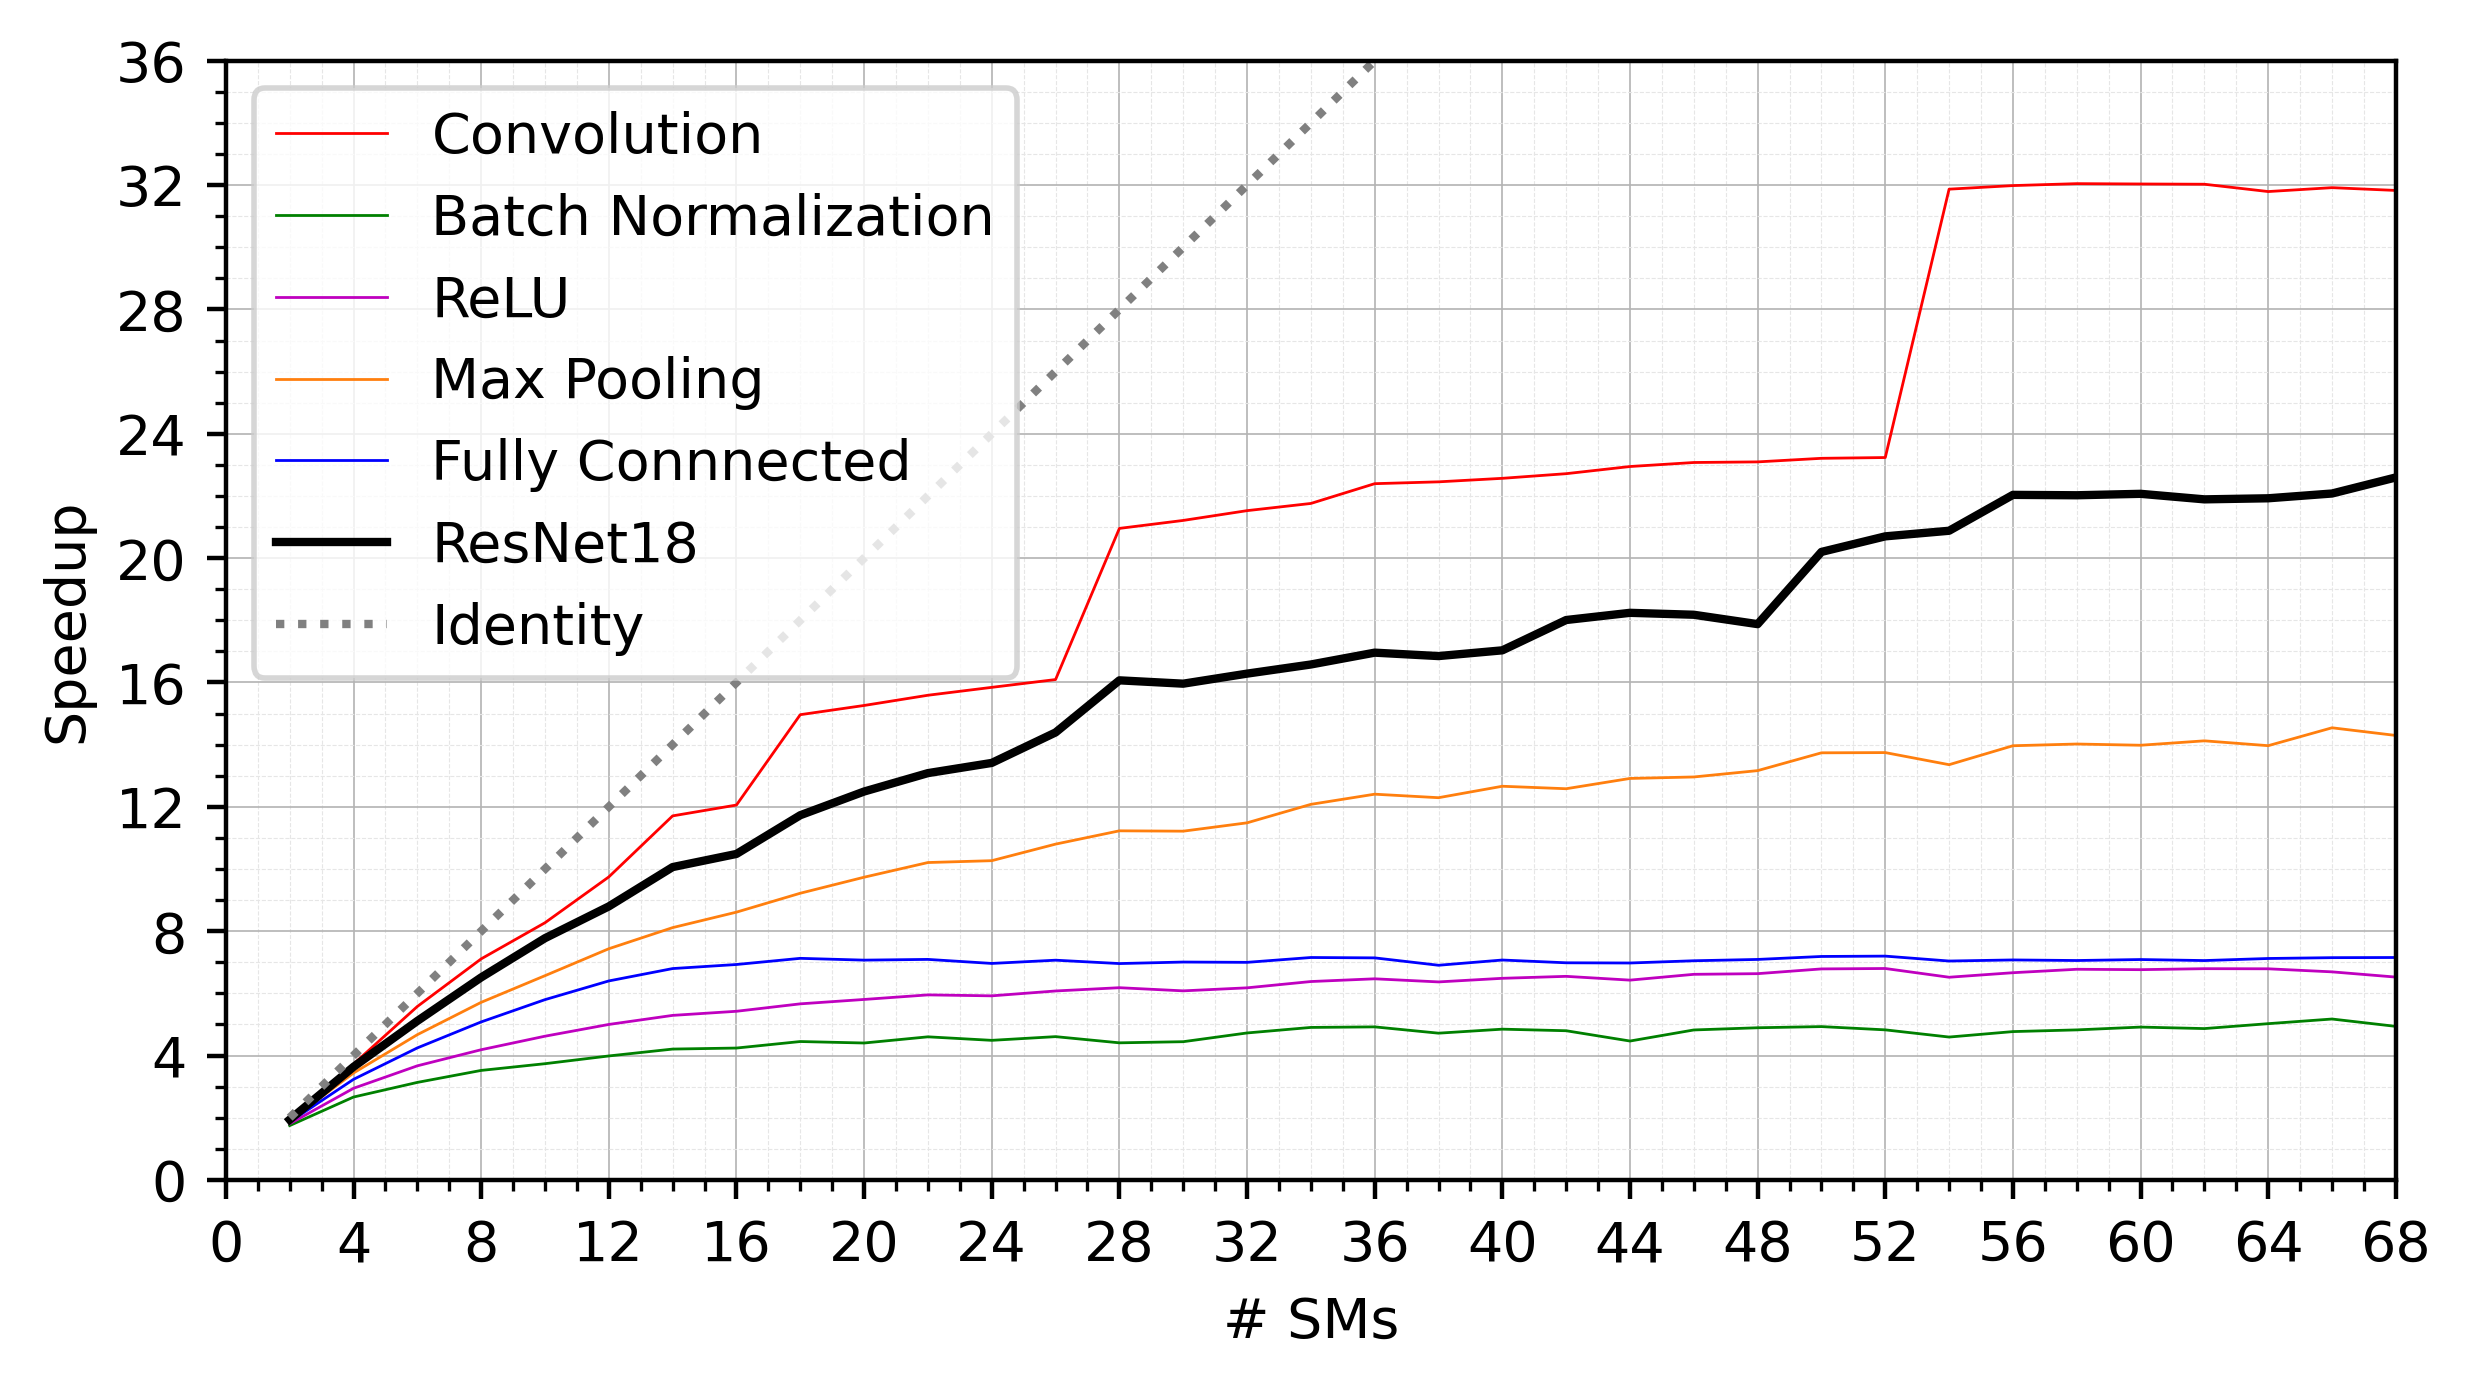

In [4]:
height = 36
plt.figure(figsize=(7, 7 * height / 68), dpi= 400)

plt.plot(x, su[0], color='r', linewidth=0.5)
plt.plot(x, su[2], color='g', linewidth=0.5)
plt.plot(x, su[3], color='m', linewidth=0.5)
plt.plot(x, su[4], color='tab:orange', linestyle='-', linewidth=0.5)
plt.plot(x, su[1], color='b', linestyle='-', linewidth=0.5)
plt.plot(x, su[5], color='k', linewidth=1.5)

id = []
for i in range(2, (len(x) * 2) + 1, 3):
    id.append(i)

plt.plot(id, id, linestyle ='dotted', color='0.5')
xticks = list(range(0, 69, 4))

plt.xticks(xticks)
plt.yticks(range(0, 69, 4))

plt.xlim(0, 68)
plt.ylim(0, height)

plt.grid(visible=True, which='minor', color='0.9', linestyle='--', linewidth=0.2)
plt.grid(visible=True, which='major', color='0.7', linestyle='-', linewidth=0.3)

plt.xlabel('# SMs')
plt.ylabel('Speedup')

plt.minorticks_on()

plt.legend([
    'Convolution',
    'Batch Normalization',
    'ReLU',
    'Max Pooling',
    'Fully Connnected',
    'ResNet18',
    'Identity'])
#     , prop={'size': 6}, loc='upper left')
plt.show()

[5, 10, 15, 20, 25, 30]
[1578.587, 827.766, 552.728, 433.671, 372.719, 316.35, 263.301, 255.681, 206.021, 202.024, 197.761, 194.592, 191.558, 147.113, 145.336, 143.212, 141.689, 137.664, 137.302, 136.613, 135.715, 134.352, 133.6, 133.486, 132.825, 132.682, 96.74, 96.392, 96.205, 96.237, 96.261, 96.974, 96.593, 96.865]


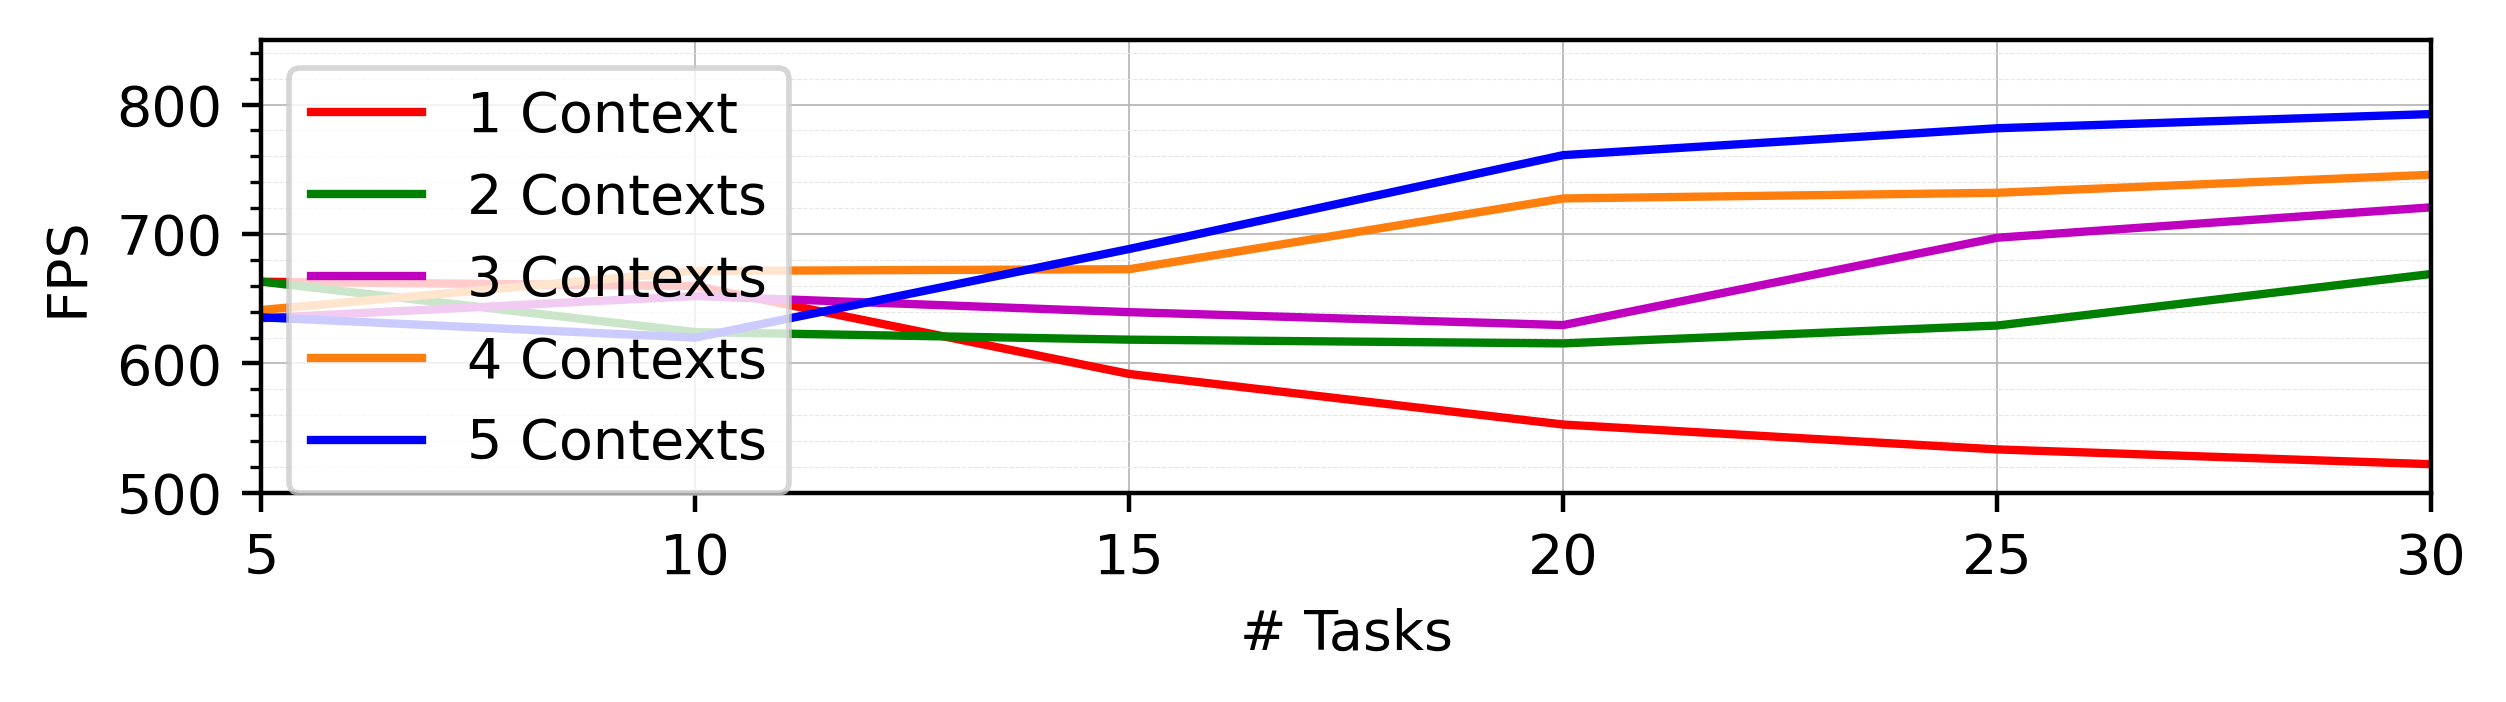

In [5]:
count = 5
x = list(range(5, 31, 5))
y1 = [[] for i in range(count)]

with open('/home/amir/repos/FGPRS/results/concurrency1 copy.csv', 'r') as file:
    dummy = csv.reader(file)
    index = 0
    
    for row in dummy:
        for i in range(1, len(x) + 1):
            y1[index].append(float(row[i]))
        
        index = index + 1
print(x)
print(y[0])
height = 36
plt.figure(figsize=(7, 1.5), dpi= 400)

plt.plot(x, y1[0], color='r')
plt.plot(x, y1[1], color='g')
plt.plot(x, y1[2], color='m')
plt.plot(x, y1[3], color='tab:orange')
plt.plot(x, y1[4], color='b')

xticks = list(range(5, 31, 5))

plt.xticks(xticks)
plt.yticks(range(500, 851, 100))

plt.xlim(5, 30)
plt.ylim(500, 850)

plt.grid(visible=True, which='minor', color='0.9', linestyle='--', linewidth=0.2)
plt.grid(visible=True, which='major', color='0.7', linestyle='-', linewidth=0.3)
plt.minorticks_on()
plt.gca().xaxis.set_minor_locator(plt.NullLocator())
plt.xlabel('# Tasks')
plt.ylabel('FPS')


plt.legend([
    '1 Context', '2 Contexts', '3 Contexts', '4 Contexts', '5 Contexts']
    , loc='upper left')
plt.show()

[5, 10, 15, 20, 25, 30]
[1578.587, 827.766, 552.728, 433.671, 372.719, 316.35, 263.301, 255.681, 206.021, 202.024, 197.761, 194.592, 191.558, 147.113, 145.336, 143.212, 141.689, 137.664, 137.302, 136.613, 135.715, 134.352, 133.6, 133.486, 132.825, 132.682, 96.74, 96.392, 96.205, 96.237, 96.261, 96.974, 96.593, 96.865]


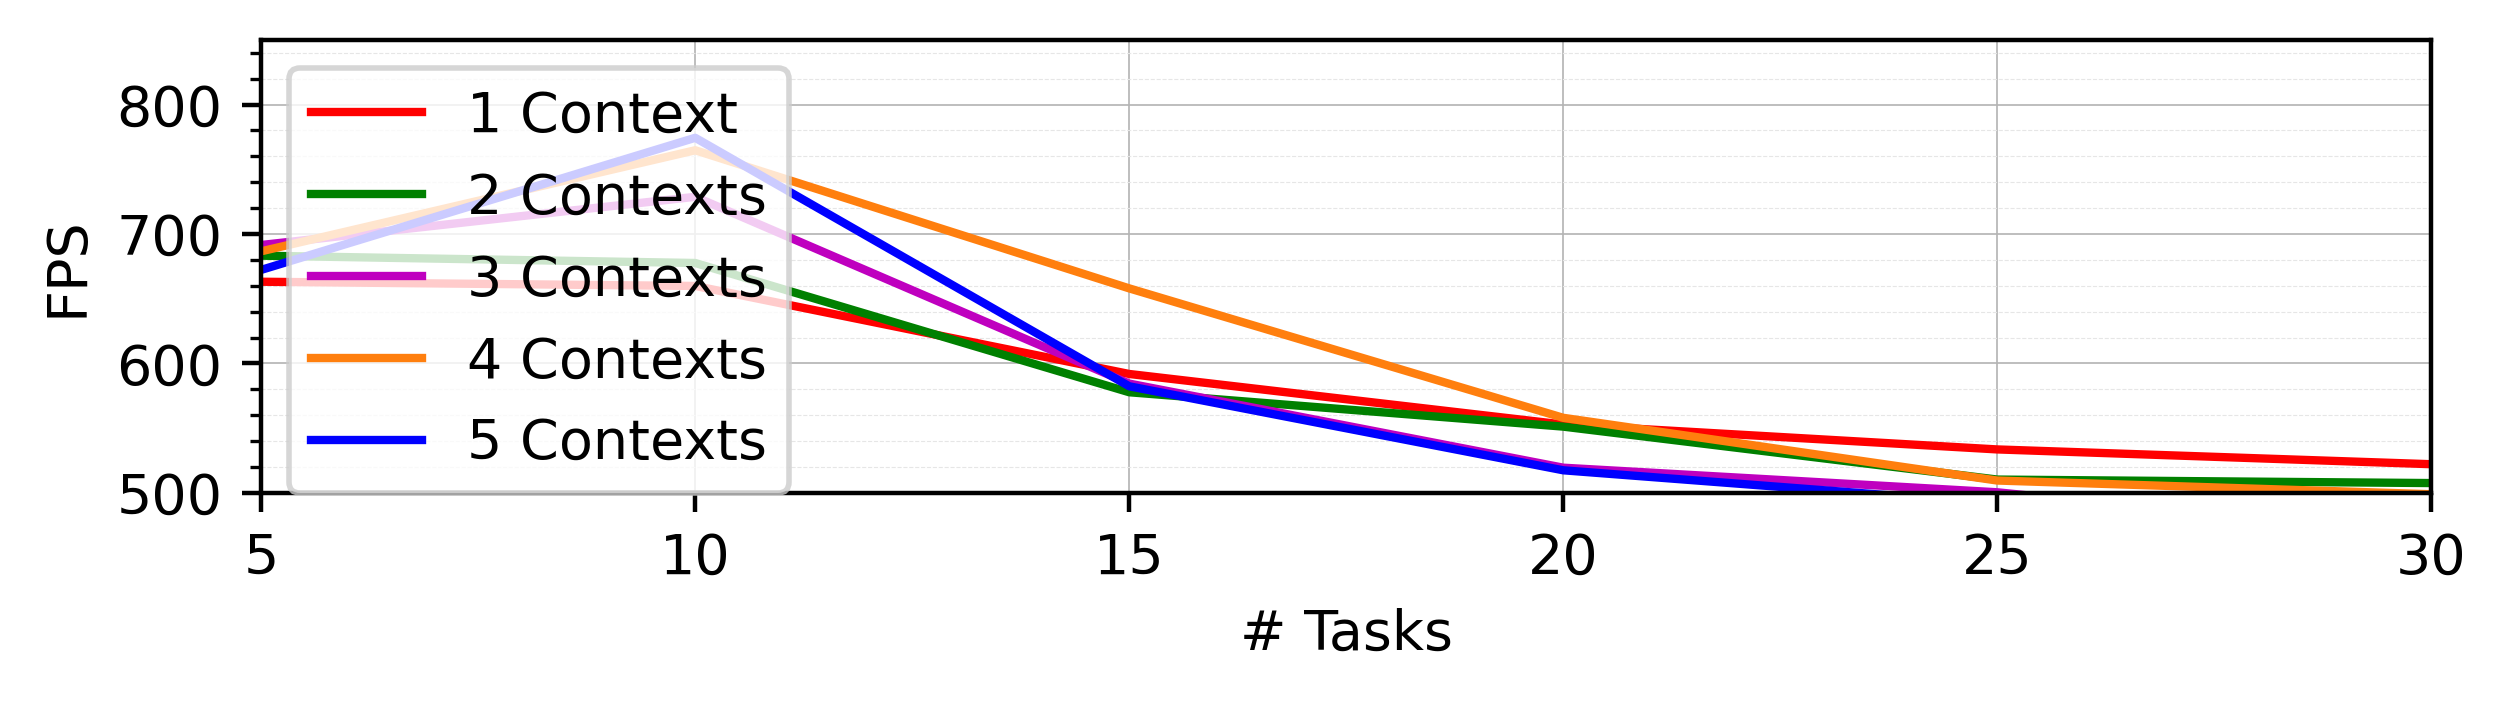

In [6]:
count = 5
x = list(range(5, 31, 5))
y2 = [[] for i in range(count)]

with open('/home/amir/repos/FGPRS/results/concurrency2.csv', 'r') as file:
    dummy = csv.reader(file)
    index = 0
    
    for row in dummy:
        for i in range(1, len(x) + 1):
            y2[index].append(float(row[i]))
        
        index = index + 1
print(x)
print(y[0])
height = 36
plt.figure(figsize=(7, 1.5), dpi= 400)

plt.plot(x, y1[0], color='r')
plt.plot(x, y2[1], color='g')
plt.plot(x, y2[2], color='m')
plt.plot(x, y2[3], color='tab:orange')
plt.plot(x, y2[4], color='b')

xticks = list(range(5, 31, 5))

plt.xticks(xticks)
plt.yticks(range(500, 851, 100))

plt.xlim(5, 30)
plt.ylim(500, 850)

plt.grid(visible=True, which='minor', color='0.9', linestyle='--', linewidth=0.2)
plt.grid(visible=True, which='major', color='0.7', linestyle='-', linewidth=0.3)
plt.minorticks_on()
plt.gca().xaxis.set_minor_locator(plt.NullLocator())
plt.xlabel('# Tasks')
plt.ylabel('FPS')


plt.legend([
    '1 Context',
    '2 Contexts', '3 Contexts', '4 Contexts', '5 Contexts']
    , loc='upper left')
plt.show()

[5, 10, 15, 20, 25, 30]
[1578.587]


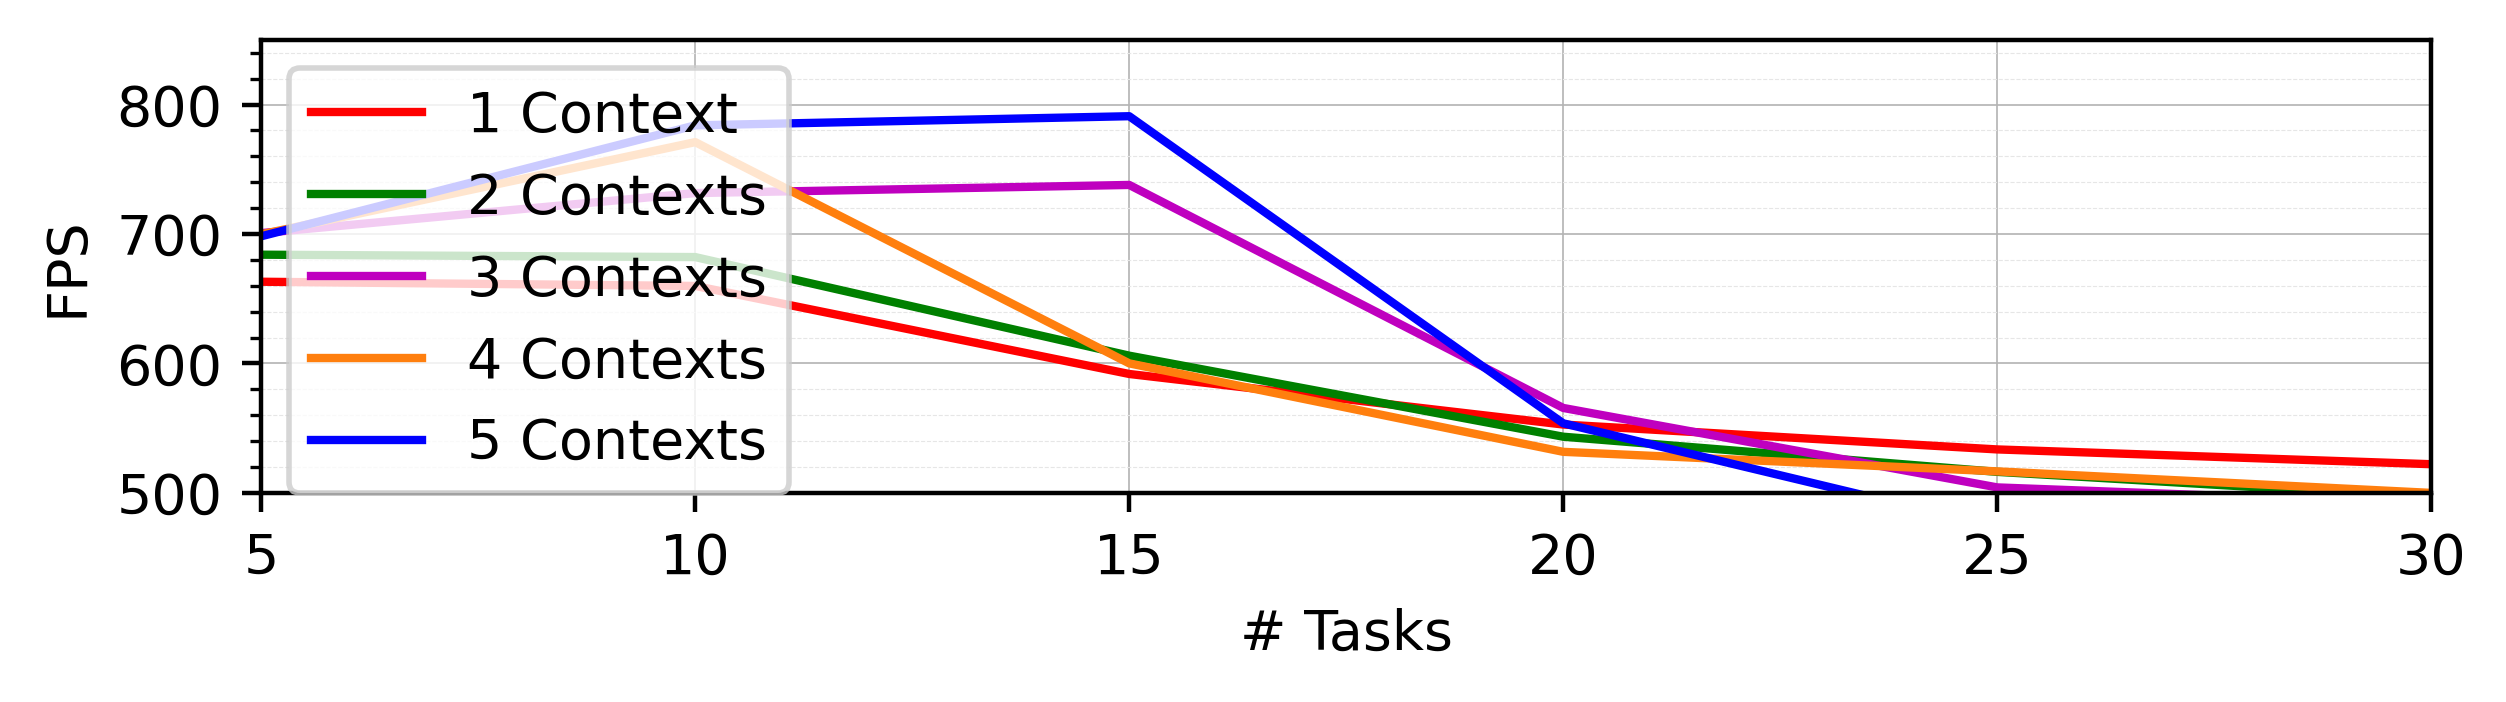

In [14]:
count = 5
x = list(range(5, 31, 5))
y3 = [[] for i in range(count)]

with open('/home/amir/repos/FGPRS/results/concurrency3.csv', 'r') as file:
    dummy = csv.reader(file)
    index = 0
    
    for row in dummy:
        for i in range(1, len(x) + 1):
            y3[index].append(float(row[i]))
        
        index = index + 1
print(x)
print(y[0])
height = 36
plt.figure(figsize=(7, 1.5), dpi= 400)

plt.plot(x, y1[0], color='r')
plt.plot(x, y3[1], color='g')
plt.plot(x, y3[2], color='m')
plt.plot(x, y3[3], color='tab:orange')
plt.plot(x, y3[4], color='b')

xticks = list(range(5, 31, 5))

plt.xticks(xticks)
plt.yticks(range(500, 851, 100))

plt.xlim(5, 30)
plt.ylim(500, 850)

plt.grid(visible=True, which='minor', color='0.9', linestyle='--', linewidth=0.2)
plt.grid(visible=True, which='major', color='0.7', linestyle='-', linewidth=0.3)
plt.minorticks_on()
plt.gca().xaxis.set_minor_locator(plt.NullLocator())
plt.xlabel('# Tasks')
plt.ylabel('FPS')


plt.legend([
    '1 Context',
    '2 Contexts', '3 Contexts', '4 Contexts', '5 Contexts']
    , loc='upper left')
plt.show()

In [15]:
import pandas as pd

m_index = 1

init = [y[0][0] * su[0][0], y[m_index][0] * su[m_index][0], y[0][0] * su[0][0], y[m_index][0] * su[m_index][0]]

x = []
y2 = [[] for i in range(4)]
su2 = [[] for i in range(4)]

csvData = pd.read_csv("/home/amir/repos/FGPRS/results/concurrency1.csv")

csvData.sort_values(csvData.columns[0], axis=0, inplace=True)
csvData.to_csv ("/home/amir/repos/FGPRS/results/concurrency2.csv", index = None, header=True)

with open('/home/amir/repos/FGPRS/results/concurrency2.csv', 'r') as file:
    dummy = csv.reader(file)
    
    for row in dummy:        
        x.append(float(row[0]))
        
        for i in range(1, 5):
            y2[i - 1].append(float(row[i]))
    
x.append(68)
y2[0].append(y[0][-1])
y2[1].append(y[m_index][-1])
y2[2].append(y[0][-1])
y2[3].append(y[m_index][-1])

def toSpeedup(x, init):
    y = []
    for d in x:
        y.append(init / d)
    
    return y

plt.figure(figsize=(7, 7 * 44 / 68), dpi= 400)

for i in range(4):
    su2[i] = toSpeedup(y2[i], init[i])

plt.plot(x, su[0], color='b', linewidth=1)
plt.plot(x, su2[0], color='b', linestyle='dashed', linewidth=1)
plt.plot(x, su2[2], color='b', linestyle='dotted', linewidth=1)
plt.plot(x, su[m_index], color='r', linewidth=1)
plt.plot(x, su2[1], color='r', linestyle='dashed', linewidth=1)
plt.plot(x, su2[3], color='r', linestyle='dotted', linewidth=1)

id = [1]
for i in range(2, 69, 2):
    id.append(i)

plt.plot(id, id, linestyle ='dotted', color='0.5')
xticks = list(range(0, 69, 4))

plt.xticks(xticks)
plt.yticks(range(0, 69, 4))

plt.xlim(0, 68)
plt.ylim(0, 44)

plt.grid(visible=True, which='major', color='0.4', linestyle='-', linewidth=0.5)
plt.grid(visible=True, which='minor', color='0.75', linestyle='--', linewidth=0.5)

plt.xlabel('# SMs')
plt.ylabel('Speedup')

plt.minorticks_on()
plt.legend([
    'cnv(iso)', 'cnv(+cnv)', 'cnv(+lin)', 'lin(iso)', 'lin(+lin)', 'lin(+cnv)',
    'Identity'])
plt.show()

IndexError: list index out of range

In [9]:
y[0]

[1578.587,
 827.766,
 552.728,
 433.671,
 372.719,
 316.35,
 263.301,
 255.681,
 206.021,
 202.024,
 197.761,
 194.592,
 191.558,
 147.113,
 145.336,
 143.212,
 141.689,
 137.664,
 137.302,
 136.613,
 135.715,
 134.352,
 133.6,
 133.486,
 132.825,
 132.682,
 96.74,
 96.392,
 96.205,
 96.237,
 96.261,
 96.974,
 96.593,
 96.865]

In [16]:
ef1 = []
eff1 = []
ef2 = []
eff2 = []

ef1.append(np.array(su[0]) / np.array(x))
ef1.append(np.array(np.minimum(su2[0], su2[2])) / np.array(x))
eff1.append(np.array(su2[0]) / np.array(x))
eff1.append(np.array(su2[2]) / np.array(x))

ef2.append(np.array(su[m_index]) / np.array(x))
ef2.append(np.array(np.minimum(su2[1], su2[3])) / np.array(x))
eff2.append(np.array(su2[1]) / np.array(x))
eff2.append(np.array(su2[3]) / np.array(x))

plt.figure(figsize=(7, 7 * 44 / 68), dpi= 400)

efx1 = np.ones((1, 34)) * su[0][33] / 68
efm1 = (np.array(ef1[0]) + np.array(ef1[1])) / 2

efx2 = np.ones((1, 34)) * su[1][33] / 68
efm2 = (np.array(ef2[0]) + np.array(ef2[1])) / 2

plt.plot(x, ef1[0], color='b', linewidth=1, label='_nolegend_')
plt.plot(x, ef1[1], color='b', linewidth=1, label='_nolegend_')
plt.plot(x, eff1[0], color='b', linestyle='dotted', linewidth=1, label='_nolegend_')
plt.fill_between(x, ef1[0], ef1[1], color='b', alpha=0.2)
plt.plot(x, efx1[0], color='b', linewidth=1, linestyle='dashed', alpha=0.9, label='_nolegend_')
# plt.plot(x, efm1, color='b', linewidth=1, linestyle='dashdot')

plt.plot(x, ef2[0], color='r', linewidth=1, label='_nolegend_')
plt.plot(x, ef2[1], color='r', linewidth=1, label='_nolegend_')
plt.plot(x, eff2[1], color='r', linestyle='dotted', linewidth=1, label='_nolegend_')
plt.fill_between(x, ef2[0], ef2[1], color='r', alpha=0.2)
plt.plot(x, efx2[0], color='r', linewidth=1, linestyle='dashed', alpha=0.9, label='_nolegend_')
# plt.plot(x, efm2, color='r', linewidth=1, linestyle='dashdot')

# plt.plot(id, id, linestyle ='dotted', color='0.5')
xticks = list(range(0, 69, 4))

plt.xticks(xticks)
# plt.yticks(range(0, 1, 0.1))

plt.xlim(0, 68)
plt.ylim(0, 1)

plt.grid(visible=True, which='major', color='0.4', linestyle='-', linewidth=0.5)
plt.grid(visible=True, which='minor', color='0.75', linestyle='--', linewidth=0.5)

plt.xlabel('# SMs')
plt.ylabel('Efficiency')

plt.minorticks_on()
plt.legend(['cnv', 'lin'])
plt.show()

ValueError: operands could not be broadcast together with shapes (0,) (6,) 

In [11]:
count = 8
x = []
y = [[] for i in range(9)]
su = [[] for i in range(9)]

with open('/home/amir/repos/FGPRS/results/speedup.csv', 'r') as file:
    dummy = csv.reader(file)

    for row in dummy:        
        x.append(float(row[0]))
        
        for i in range(1, count + 1):
            y[i - 1].append(float(row[i]))

with open('/home/amir/repos/FGPRS/results/speedup2.csv', 'r') as file:
    dummy = csv.reader(file)

    for row in dummy:        
        y[8].append(float(row[5]))

def toSpeedup(x):
    y = []
    f = min(math.pow(2 * x[0] / x[1] * x[0] / x[1], 1 / 3), 2) * x[0]
#     print(x[0] / x[1])
#     print(x[1] / x[3])
#     print(f / x[0])
#     print('-----')
    for d in x:
        y.append(f / d)
    
    return y

plt.figure(figsize=(7, 7 * 44 / 68), dpi= 400)

for i in range(count + 1):
    su[i] = toSpeedup(y[i])

plt.plot(x, su[0], color='b', linewidth=1)
plt.plot(x, su[1], color='r', linewidth=1)
plt.plot(x, su[2], color='g', linewidth=1)
plt.plot(x, su[3], color='k', linewidth=1)
plt.plot(x, su[4], color='m', linewidth=1)
plt.plot(x, su[5], color='c', linewidth=1)
plt.plot(x, su[6], color='tab:orange', linewidth=1)
plt.plot(x, su[7], color='tab:brown', linewidth=1)
plt.plot(x, su[8], color='y', linewidth=1)

id = []
for i in range(2, 69, 3):
    id.append(i)

plt.plot(id, id, linestyle ='dotted', color='0.5')
xticks = list(range(0, 69, 4))

plt.xticks(xticks)
plt.yticks(range(0, 69, 4))

plt.xlim(0, 68)
plt.ylim(0, 44)

plt.grid(visible=True, which='major', color='0.4', linestyle='-', linewidth=0.5)
plt.grid(visible=True, which='minor', color='0.85', linestyle='--', linewidth=0.5)

plt.xlabel('# SMs')
plt.ylabel('Speedup')

plt.minorticks_on()
plt.legend([
    'Convolution', 'Linear', 'Batch Norm', 'ReLU',
    'Max Pool', 'Avg Pool', 'Adp Max Pool', 'Adp Avg Pool',
    'Sum', 'Identity'])
plt.show()

IndexError: list index out of range